# [Kaggle's](https://www.kaggle.com/) Titanic Competition

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

In [4]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
df_train.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.75,NaN,Q


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_train.Age[:6]

0    22
1    38
2    26
3    35
4    35
5   NaN
Name: Age, dtype: float64

In [9]:
df_train[['Sex','Pclass','Age']].head(6)

,Sex,Pclass,Age
0,male,3,22
1,female,1,38
2,female,3,26
3,female,1,35
4,male,3,35
5,male,3,NaN


In [10]:
df_train[df_train.Age > 70][['Sex','Pclass','Age','Survived']]

,Sex,Pclass,Age,Survived
96,male,1,71.0,0
116,male,3,70.5,0
493,male,1,71.0,0
630,male,1,80.0,1
851,male,3,74.0,0


In [14]:
df_train['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [15]:
for i in range(1,4):
    print "%i class, F: %i" % (i, len(df_train[ (df_train.Sex == "female") & (df_train.Pclass == i) ]))
    print "%i class, M: %i" % (i, len(df_train[ (df_train.Sex == "male") & (df_train.Pclass == i) ]))

1 class, F: 94
1 class, M: 122
2 class, F: 76
2 class, M: 108
3 class, F: 144
3 class, M: 347


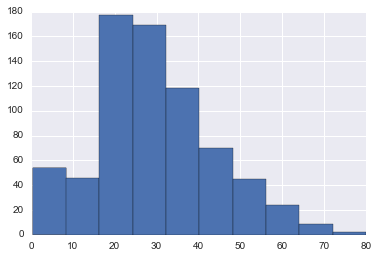

In [16]:
df_train['Age'].hist()
plt.show()
# because of the influence of a few rare 70- and 80-year olds the Age histogram
# seems positively skewed 

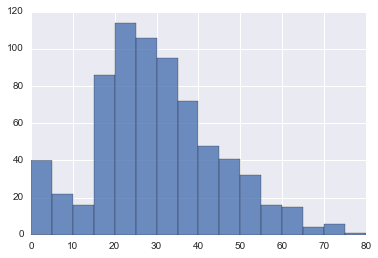

In [17]:
df_train['Age'].dropna().hist(bins=16, range=(0,80), alpha = .8)
plt.show()

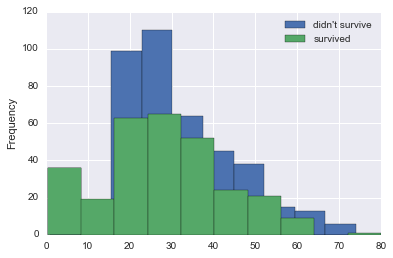

In [18]:
plt.figure()
df_train[df_train.Survived==0]['Age'].plot(kind="hist", label="didn't survive")
df_train[df_train.Survived==1]['Age'].plot(kind="hist", label="survived")
plt.legend();

In [22]:
df_train["is_male"] = df_train["Sex"].map({"female": 0, "male": 1}).astype(int)
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0


In [23]:
df_test["is_male"] = df_test["Sex"].map({"female": 0, "male": 1}).astype(int)
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_male
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1


In [36]:
# median of age per gender and class
median_ages = np.zeros((2, 3))
median_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [37]:
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i][j] = df_train[(df_train["is_male"] == i) & (df_train["Pclass"] == j+1)]["Age"].dropna().median()
median_ages        

array([[ 35. ,  28. ,  21.5],
       [ 40. ,  30. ,  25. ]])

In [38]:
df_train["age_fill"] = df_train["Age"]
df_test["age_fill"] = df_test["Age"]

In [39]:
for i in range(0,2):
    for j in range(0,3):
        df_train.loc[ (df_train["Age"].isnull()) & (df_train["is_male"] == i) & (df_train["Pclass"] == j+1),
               "age_fill"] = median_ages[i,j]
df_train[df_train["Age"].isnull()][["is_male", "Pclass", "Age", "age_fill"]].head(6)

,is_male,Pclass,Age,age_fill
5,1,3,NaN,25.0
17,1,2,NaN,30.0
19,0,3,NaN,21.5
26,1,3,NaN,25.0
28,0,3,NaN,21.5
29,1,3,NaN,25.0


In [40]:
for i in range(0,2):
    for j in range(0,3):
        df_test.loc[ (df_test["Age"].isnull()) & (df_test["is_male"] == i) & (df_test["Pclass"] == j+1),
               "age_fill"] = median_ages[i,j]
df_test[df_test["Age"].isnull()][["is_male", "Pclass", "Age", "age_fill"]].head(6)

,is_male,Pclass,Age,age_fill
10,1,3,NaN,25.0
22,0,1,NaN,35.0
29,1,3,NaN,25.0
33,0,3,NaN,21.5
36,0,3,NaN,21.5
39,1,3,NaN,25.0


In [45]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_male,age_fill
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,22
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0,38
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26


In [47]:
df_train = df_train.join(pd.get_dummies(df_train.Pclass, prefix='pclass'))
df_train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_male,age_fill,pclass_1,pclass_2,pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S,1,22,0,0,1


In [48]:
df_test = df_test.join(pd.get_dummies(df_test.Pclass, prefix='pclass'))
df_test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_male,age_fill,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,34.5,0,0,1


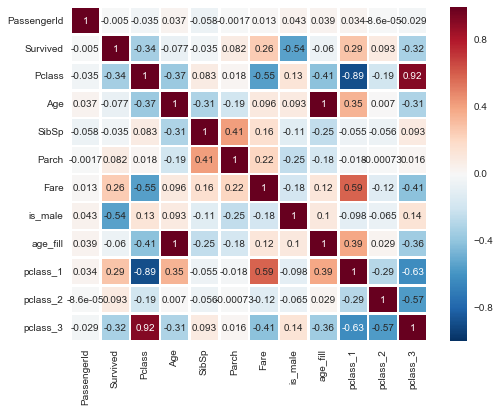

In [50]:
plt.figure(figsize=(8,6))
sns.heatmap(df_train.corr(), annot=True, linewidths=1.5)

In [51]:
# train dataset
df_train.to_csv('data/clean_train.csv', sep=',', index=False)

# test dataset
df_test.to_csv('data/clean_test.csv', sep=',', index=False)